In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("../datasets/diamonds.csv")
data = dataset.loc[:,['carat', 'depth', 'table', 'cut', 'price']]
print(data.head(20))

    carat  depth  table        cut  price
0    0.23   61.5   55.0      Ideal    326
1    0.21   59.8   61.0    Premium    326
2    0.23   56.9   65.0       Good    327
3    0.29   62.4   58.0    Premium    334
4    0.31   63.3   58.0       Good    335
5    0.24   62.8   57.0  Very Good    336
6    0.24   62.3   57.0  Very Good    336
7    0.26   61.9   55.0  Very Good    337
8    0.22   65.1   61.0       Fair    337
9    0.23   59.4   61.0  Very Good    338
10   0.30   64.0   55.0       Good    339
11   0.23   62.8   56.0      Ideal    340
12   0.22   60.4   61.0    Premium    342
13   0.31   62.2   54.0      Ideal    344
14   0.20   60.2   62.0    Premium    345
15   0.32   60.9   58.0    Premium    345
16   0.30   62.0   54.0      Ideal    348
17   0.30   63.4   54.0       Good    351
18   0.30   63.8   56.0       Good    351
19   0.30   62.7   59.0  Very Good    351


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
print(X)
print(y)

[[0.23 61.5 55.0 'Ideal']
 [0.21 59.8 61.0 'Premium']
 [0.23 56.9 65.0 'Good']
 ...
 [0.71 60.5 55.0 'Premium']
 [0.71 59.8 62.0 'Premium']
 [0.7 60.5 59.0 'Very Good']]
[ 326  326  327 ... 2756 2756 2757]


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[:5])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
scaled_X = scaler.transform(X)
print(scaled_X[:5])

[[0.0 0.0 1.0 0.0 0.0 0.23 61.5 55.0]
 [0.0 0.0 0.0 1.0 0.0 0.21 59.8 61.0]
 [0.0 1.0 0.0 0.0 0.0 0.23 56.9 65.0]
 [0.0 0.0 0.0 1.0 0.0 0.29 62.4 58.0]
 [0.0 1.0 0.0 0.0 0.0 0.31 63.3 58.0]]
[[0.         0.         1.         0.         0.         0.00623701
  0.51388889 0.23076923]
 [0.         0.         0.         1.         0.         0.002079
  0.46666667 0.34615385]
 [0.         1.         0.         0.         0.         0.00623701
  0.38611111 0.42307692]
 [0.         0.         0.         1.         0.         0.01871102
  0.53888889 0.28846154]
 [0.         1.         0.         0.         0.         0.02286902
  0.56388889 0.28846154]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  352.92   872.  ]
 [  393.04   478.  ]
 [10184.61  6031.  ]
 ...
 [ 6151.32  3847.  ]
 [ 7739.78  7312.  ]
 [ 3260.96  1917.  ]]


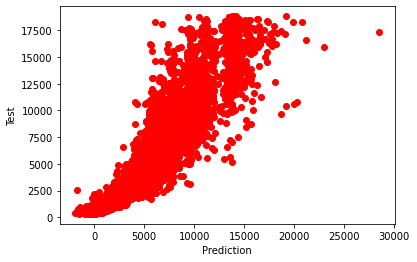

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.xlabel('Prediction')
plt.ylabel('Test')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(regressor.score(X_train, y_train))
print(regressor.coef_)